In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv("C:\\Users\\vmadmin\\Documents\\GitHub\\RegressionAnalysis-CarPricePrediction\\car_price_prediction.csv")
len(df)

19237

In [67]:
df.head(5)

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [68]:
# df.info
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [69]:
df.drop('ID', axis=1, inplace=True)

In [70]:
df.describe()

Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   1.855593e+04   2010.912824      4.582991      6.582627
std    1.905813e+05      5.668673      1.199933      4.320168
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    5.331000e+03   2009.000000      4.000000      4.000000
50%    1.317200e+04   2012.000000      4.000000      6.000000
75%    2.207500e+04   2015.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

In [71]:
# sns.pairplot(df)

## REMOVE EXTREME VALUES from 'PRICE'

In [72]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [73]:
quant1 = df['Price'].quantile(0.25)
quant3 = df['Price'].quantile(0.75)
iqr = quant3 - quant1
iqr

16744.0

In [74]:
lower_lim = quant1 - 1.5*iqr
if lower_lim<=0:
    lower_lim = 0
upper_lim = quant3 + 15*iqr

In [75]:
lower_lim,upper_lim

(0, 273235.0)

In [76]:
outlier_low = df['Price'] <= lower_lim
outlier_high = df['Price'] >=upper_lim

# len(df[(outlier_low | outlier_high)])
df[(outlier_low | outlier_high)]

Price  Levy   Manufacturer                    Model  Prod. year  \
1225     627220     -  MERCEDES-BENZ           G 65 AMG 63AMG        2020   
5008     308906  1694        PORSCHE                      911        2016   
7749     288521  2269            BMW  M5 Машина в максимально        2018   
8541     872946  2067    LAMBORGHINI                     Urus        2019   
9367     297930     -  MERCEDES-BENZ                 AMG GT S        2015   
14839    297930     -     LAND ROVER        Range Rover Vogue        2019   
16983  26307500     -           OPEL                    Combo        1999   

          Category Leather interior Fuel type Engine volume   Mileage  \
1225          Jeep              Yes    Petrol     6.3 Turbo      0 km   
5008         Coupe              Yes    Petrol             4   8690 km   
7749         Sedan              Yes    Petrol           4.4  13500 km   
8541     Universal              Yes    Petrol             4   2531 km   
9367         Coupe              Yes    Petrol     4.0 Turbo  20000 km   
14839         Jeep              Yes    Diesel     3.0 Turbo   4500 km   
16983  Goods wagon               No    Diesel           1.7  99999 km   

       Cylinders Gear box type Drive wheels   Doors       Wheel  Color  \
1225         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
5008         6.0     Automatic         Rear  02-Mar  Left wheel  Black   
7749         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
8541         8.0     Tiptronic          4x4  04-May  Left wheel  Black   
9367         8.0     Tiptronic         Rear  02-Mar  Left wheel  White   
14839        8.0     Tiptronic          4x4  04-May  Left wheel  Black   
16983        4.0        Manual        Front  02-Mar  Left wheel   Blue   

       Airbags  
1225        12  
5008        12  
7749         0  
8541         0  
9367        16  
14839       12  
16983        0

In [77]:
df_fin = df[~(outlier_low | outlier_high)].copy()
# df_fin

### Update door column and extract only doors


In [78]:
new_door_list = df_fin['Doors'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [79]:
df_fin.drop('Doors',axis=1,inplace=True)
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels             Wheel   Color  Airbags  
0         Automatic          4x4        Left wheel  Silver       12  
1         Tiptronic          4x4        Left wheel   Black        8  
2          Variator        Front  Right-hand drive   Black        2  
3         Automatic          4x4        Left wheel   White        0  
4         Automatic        Front        Left wheel  Silver        4  
...             ...          ...               ...     ...      ...  
19232        Manual         Rear        Left wheel  Silver        5  
19233     Tiptronic        Front        Left wheel     Red        8  
19234     Automatic        Front        Left wheel    Grey        4  
19235     Automatic        Front        Left wheel   Black        4  
19236     Automatic        Front        Left wheel   White       12  

[19230 rows x 16 columns]

In [80]:
df_fin['Doors'] = new_door_list
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels             Wheel   Color  Airbags  Doors  
0         Automatic          4x4        Left wheel  Silver       12      4  
1         Tiptronic          4x4        Left wheel   Black        8      4  
2          Variator        Front  Right-hand drive   Black        2      4  
3         Automatic          4x4        Left wheel   White        0      4  
4         Automatic        Front        Left wheel  Silver        4      4  
...             ...          ...               ...     ...      ...    ...  
19232        Manual         Rear        Left wheel  Silver        5      2  
19233     Tiptronic        Front        Left wheel     Red        8      4  
19234     Automatic        Front        Left wheel    Grey        4      4  
19235     Automatic        Front        Left wheel   Black        4      4  
19236     Automatic        Front        Left wheel   White       12      4  

[19230 rows x 17 columns]

## Update the Mileage Column to numeric

In [81]:
list_mileage = df_fin['Mileage'].values


- Step 1: Convert all entries to String to apply regular expression
        -> Use .astype('str')
- Step 2: Apply the extractall () from regular expressions
        -> .str.extractall('(\d+)') - this will match for 1 or more digits
- Step 3: use unstack as multiple matches will be achieved. We only need final match per row, so use
        -> .unstack()
- Step 4: Use fill_na('') to replace all nan values, otherwise any operation that involves a Nan value will have nan results
- Step5. .sum(axis =1) is used to bring all numbers to one cell
- Finally convert to int by .astype(int)

In [82]:
# new_mileage_list = df_fin['Mileage'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
# df_fin.drop('Mileage',axis=1,inplace=True)
import re

In [178]:
xyz2 = df_fin['Mileage'].str.extract(r'(\d+.\d+)').fillna('0').astype(float)

In [179]:
xyz2

0
0      186005.0
1      192000.0
2      200000.0
3      168966.0
4       91901.0
...         ...
19232  300000.0
19233  161600.0
19234  116365.0
19235   51258.0
19236  186923.0

[19230 rows x 1 columns]

In [180]:
df_fin['Mileage_km'] = xyz2
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels             Wheel   Color  Airbags  Doors  \
0         Automatic          4x4        Left wheel  Silver       12      4   
1         Tiptronic          4x4        Left wheel   Black        8      4   
2          Variator        Front  Right-hand drive   Black        2      4   
3         Automatic          4x4        Left wheel   White        0      4   
4         Automatic        Front        Left wheel  Silver        4      4   
...             ...          ...               ...     ...      ...    ...   
19232        Manual         Rear        Left wheel  Silver        5      2   
19233     Tiptronic        Front        Left wheel     Red        8      4   
19234     Automatic        Front        Left wheel    Grey        4      4   
19235     Automatic        Front        Left wheel   Black        4      4   
19236     Automatic        Front        Left wheel   White       12      4   

       Mileage_km  
0        186005.0  
1        192000.0  
2        200000.0  
3        168966.0  
4         91901.0  
...           ...  
19232    300000.0  
19233    161600.0  
19234    116365.0  
19235     51258.0  
19236    186923.0  

[19230 rows x 18 columns]

In [181]:
quant1 = df['Price'].quantile(0.25)
quant3 = df['Price'].quantile(0.75)
iqr = quant3 - quant1
iqr

16744.0

In [197]:
lower_lim = quant1 - 1.5*iqr
if(lower_lim <=0 ):
    lower_lim = 1
upper_lim = quant3 + 45*iqr
lower_lim,upper_lim

(1, 775555.0)

In [204]:
df_fin = df_fin.loc[~((df_fin['Mileage_km'] > upper_lim)|((df_fin['Mileage_km'])<=lower_lim))]

In [205]:
df_fin

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels             Wheel   Color  Airbags  Doors  \
0         Automatic          4x4        Left wheel  Silver       12      4   
1         Tiptronic          4x4        Left wheel   Black        8      4   
2          Variator        Front  Right-hand drive   Black        2      4   
3         Automatic          4x4        Left wheel   White        0      4   
4         Automatic        Front        Left wheel  Silver        4      4   
...             ...          ...               ...     ...      ...    ...   
19232        Manual         Rear        Left wheel  Silver        5      2   
19233     Tiptronic        Front        Left wheel     Red        8      4   
19234     Automatic        Front        Left wheel    Grey        4      4   
19235     Automatic        Front        Left wheel   Black        4      4   
19236     Automatic        Front        Left wheel   White       12      4   

       Mileage_km  
0        186005.0  
1        192000.0  
2        200000.0  
3        168966.0  
4         91901.0  
...           ...  
19232    300000.0  
19233    161600.0  
19234    116365.0  
19235     51258.0  
19236    186923.0  

[18408 rows x 18 columns]

In [131]:
# sns.pairplot(df_fin)

## Inferences from the ScatterPlots

- Latest and Newest cars are more expensive than if they are old
- Mileage vs Price Graphs shows that as the Mileage increases Price reduces drastically
- Newer Production Cars have more airbags in general than old production cars
- Newer Production Year Cars have more cylinders in general than old production year cars

In [206]:
df_fin.head()

Price  Levy Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328  1399        LEXUS   RX 450        2010       Jeep              Yes   
1  16621  1018    CHEVROLET  Equinox        2011       Jeep               No   
2   8467     -        HONDA      FIT        2006  Hatchback               No   
3   3607   862         FORD   Escape        2011       Jeep              Yes   
4  11726   446        HONDA      FIT        2014  Hatchback              Yes   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid           3.5  186005 km        6.0     Automatic          4x4   
1    Petrol             3  192000 km        6.0     Tiptronic          4x4   
2    Petrol           1.3  200000 km        4.0      Variator        Front   
3    Hybrid           2.5  168966 km        4.0     Automatic          4x4   
4    Petrol           1.3   91901 km        4.0     Automatic        Front   

              Wheel   Color  Airbags  Doors  Mileage_km  
0        Left wheel  Silver       12      4    186005.0  
1        Left wheel   Black        8      4    192000.0  
2  Right-hand drive   Black        2      4    200000.0  
3        Left wheel   White        0      4    168966.0  
4        Left wheel  Silver        4      4     91901.0

In [207]:
# df_fin.to_csv('check_mileage.csv')
# 

In [208]:
df_fin['Mileage_km'].max()

760000.0

In [209]:
print('Total:',len(df_fin))
print('Unique Manufacturer:',len(df_fin.Manufacturer.unique()))
print('Unique Model:',len(df_fin.Model.unique()))
print('Unique Engine Volume:',len(df_fin['Engine volume'].unique()))
print('Unique Fuel Type:',len(df_fin['Fuel type'].unique()))
print('Unique Cylinders:',len(df_fin.Cylinders.unique()))
print('Unique Category:',len(df_fin.Category.unique()))
print('Unique Production Year:',len(df_fin['Prod. year'].unique())) #Good Representation

Total: 18408
Unique Manufacturer: 64
Unique Model: 1552
Unique Engine Volume: 107
Unique Fuel Type: 7
Unique Cylinders: 13
Unique Category: 11
Unique Production Year: 52


In [210]:
print('Total:',len(df_fin))
print('\n')
print('Unique Manufacturer:',df_fin.Manufacturer.unique())
print('\n')
print('Unique Model:',df_fin.Model.unique())
print('\n')
print('Unique Engine Volume:',df_fin['Engine volume'].unique())
print('\n')
print('Unique Fuel Type:',df_fin['Fuel type'].unique())
print('\n')
print('Unique Cylinders:',df_fin.Cylinders.unique())
print('\n')
print('Unique Category:',df_fin.Category.unique())
print('\n')
print('Unique Production Year:',df_fin['Prod. year'].unique()) #Good Representation

Total: 18408


Unique Manufacturer: ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'GMC' 'FIAT' 'INFINITI'
 'MAZDA' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'MERCURY' 'ZAZ' 'UAZ' 'SEAT' 'LANCIA' 'MOSKVICH'
 'MASERATI' 'FERRARI' 'SAAB' 'ROLLS-ROYCE' 'ROVER' 'PONTIAC' 'SATURN'
 'ASTON MARTIN' 'GREATWALL']


Unique Model: ['RX 450' 'Equinox' 'FIT' ... 'RX 450 F SPORT' 'Prius C aqua' 'Optima ex']


Unique Engine Volume: ['3.5' '3' '1.3' '2.5' '2' '1.8' '2.4' '1.6' '3.3' '2.0 Turbo' '2.2 Turbo'
 '1.5' '4.4' '3.0 Turbo' '1.4 Turbo' '3.6' '4' '2.3' '1.5 Turbo'
 '1.6 Turbo' '2.2' '2.3 Turbo' '4.7' '1.4' '5.5' '2.8 Turbo' '3.2' '3.8'
 '4.6' '1.2' '5' '1.7' '2.9' '0.5' '1

### NON NUMERIC COLUMNS
1. Don't Consider Model Name (Done)
2. Don't Consider Manufacturer Name (Done)
3. Change the Entire Unique Fuel Type -> One Hot Encoding 
4. Change the Engine Volume to numeric instead of strings
5. Change the Cylinders to integer (To Do/Optional)
6. OPTIONAL - Try One Hot Encoding in the Unique Category
7. Change Leather Seats to Y/N and do One Hot Encoding (Ready)

### NUMERIC COLUMNS
1. Price	
2. Prod. year	
3. Cylinders	
4. Airbags
Numeric Columns need to be normalized/ MinMaxScaler used


In [211]:
df_fin.Doors.unique()
#Drop the Doors Column because it is filledd with wrong information
# or
# Change the 04-May to only number as 04 and 02-Mar as 02 abd >5 as 5

array([4, 2, 5])

### Dataset Distribution

In [212]:
import plotly.express as px

In [213]:
df_fin.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Doors', 'Mileage_km'],
      dtype='object')

In [214]:
tmp = df[df['Manufacturer']=='LAMBORGHINI']
tmp

Price  Levy Manufacturer Model  Prod. year   Category Leather interior  \
8541  872946  2067  LAMBORGHINI  Urus        2019  Universal              Yes   

     Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
8541    Petrol             4  2531 km        8.0     Tiptronic          4x4   

       Doors       Wheel  Color  Airbags  
8541  04-May  Left wheel  Black        0

In [215]:
print(df_fin['Manufacturer'].unique())
df1 = df_fin[['Manufacturer','Price']]
fig = px.scatter(df1, x='Manufacturer',y='Price',color = 'Manufacturer')
fig.show()

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'GMC' 'FIAT' 'INFINITI'
 'MAZDA' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'MERCURY' 'ZAZ' 'UAZ' 'SEAT' 'LANCIA' 'MOSKVICH'
 'MASERATI' 'FERRARI' 'SAAB' 'ROLLS-ROYCE' 'ROVER' 'PONTIAC' 'SATURN'
 'ASTON MARTIN' 'GREATWALL']


In [216]:
df2 = df_fin[['Leather interior','Price']]
fig2 = px.scatter(df2, x='Leather interior',y='Price',color = 'Leather interior')
fig2.show()

In [217]:
df3 = df_fin[['Prod. year','Price']]
fig3 = px.scatter(df3, x='Prod. year',y='Price',color = 'Prod. year')
fig3.show()

In [218]:
df4 = df_fin[['Fuel type','Price']]
fig4 = px.scatter(df4, x='Fuel type',y='Price',color = 'Fuel type')
fig4.show()

In [219]:
df5 = df_fin[['Color','Price']]
fig5 = px.scatter(df5, x='Color',y='Price',color = 'Color')
fig5.show()

In [220]:
df_fin.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Doors', 'Mileage_km'],
      dtype='object')

In [221]:
df6 = df_fin[['Category','Price']]
fig6 = px.scatter(df6, x='Category',y='Price',color = 'Category')
fig6.show()

In [222]:
df7 = df_fin[['Doors','Price']]
fig7 = px.scatter(df7, x='Doors',y='Price',color = 'Doors')
fig7.show()

In [223]:
df8 = df_fin[['Mileage_km','Price']]
fig8 = px.scatter(df8, x='Mileage_km',y='Price',color = 'Mileage_km')
fig8.show()

In [224]:
df['Drive wheels'].unique()
## One Hot Encoding for this column too

array(['4x4', 'Front', 'Rear'], dtype=object)

In [225]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18408 non-null  int64  
 1   Levy              18408 non-null  object 
 2   Manufacturer      18408 non-null  object 
 3   Model             18408 non-null  object 
 4   Prod. year        18408 non-null  int64  
 5   Category          18408 non-null  object 
 6   Leather interior  18408 non-null  object 
 7   Fuel type         18408 non-null  object 
 8   Engine volume     18408 non-null  object 
 9   Mileage           18408 non-null  object 
 10  Cylinders         18408 non-null  float64
 11  Gear box type     18408 non-null  object 
 12  Drive wheels      18408 non-null  object 
 13  Wheel             18408 non-null  object 
 14  Color             18408 non-null  object 
 15  Airbags           18408 non-null  int64  
 16  Doors             18408 non-null  int32 

### One Hot Encoding the Columns

In [226]:
## Color needs to be changed to Top2 colors and others
## Drive wheels -> 4x4, front wheel or rear wheel
## Fuel Type -> Remove Hydrogen and then keep petrol, diesel, others
## Leather Interior directly one hot encode
"""
 5   Category          19230 non-null  object     Y
 6   Leather interior  19230 non-null  object     YY
 7   Fuel type         19230 non-null  object     YY
 8   Engine volume     19230 non-null  object     XX
 10  Gear box type     19230 non-null  object     YY
 11  Drive wheels      19230 non-null  object     YY
 12  Wheel             19230 non-null  object     XX
 13  Color             19230 non-null  object     YY
"""
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

df_fin.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Doors', 'Mileage_km'],
      dtype='object')

In [227]:
dff = df_fin.copy()

In [228]:
## Change Leather using One Hot Encoding
df_fin['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

In [229]:
## One Hot Encode the Drive wheels
df_fin['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [230]:
## Change Gear box Type to OHE
# df_fin['Gear box type'].unique()
dff.loc[((dff['Gear box type']!='Automatic') & (dff['Gear box type']!='Manual')),'Gear box type'] = 'OtherGearbox'
# dff['Gear box type'].unique()


In [231]:
# dff['Gear box type'].value_counts()
dff['Gear box type'].value_counts()

Automatic       13045
OtherGearbox     3720
Manual           1643
Name: Gear box type, dtype: int64

In [232]:
## Change Color and then OHE
dff.loc[dff['Color']!='Black','Color'] = 'OtherColor'

# https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
dff.Color.unique()
dff.Color.value_counts()

OtherColor    13580
Black          4828
Name: Color, dtype: int64

In [233]:
## Change Fuel Type and OHE
# dff['Fuel type'].unique()

dff.loc[((dff['Fuel type']!='Petrol')&(dff['Fuel type']!='Diesel')),'Fuel type'] = 'OtherFuel'
dff['Fuel type'].unique()

array(['OtherFuel', 'Petrol', 'Diesel'], dtype=object)

In [234]:
dff.corr()

Price  Prod. year  Cylinders   Airbags     Doors  Mileage_km
Price       1.000000    0.286373   0.099379 -0.031031  0.015740   -0.249637
Prod. year  0.286373    1.000000  -0.112866  0.221040  0.194410   -0.245953
Cylinders   0.099379   -0.112866   1.000000  0.173981 -0.037302    0.118123
Airbags    -0.031031    0.221040   0.173981  1.000000  0.042368   -0.045581
Doors       0.015740    0.194410  -0.037302  0.042368  1.000000    0.002119
Mileage_km -0.249637   -0.245953   0.118123 -0.045581  0.002119    1.000000

In [161]:
# dff.head()
dff['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [162]:
dff['Category'].value_counts()

Sedan          8735
Jeep           5471
Hatchback      2847
Minivan         647
Coupe           530
Universal       363
Microbus        306
Goods wagon     232
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [163]:
## Change the Category to only few like SUV, Sedan Other
# dff.loc[(dff['Category']=='Jeep'),'Category'] = 'SUV'
dff.loc[~((dff['Category']=='Sedan')|(dff['Category']=='Jeep')), 'Category'] = 'Other'

In [164]:
dff['Category'].value_counts()

Sedan    8735
Jeep     5471
Other    5024
Name: Category, dtype: int64

### OHE 


In [165]:
dff2 = pd.get_dummies(dff,columns=['Fuel type','Category','Gear box type','Color','Drive wheels','Leather interior'])#,drop_first = True)

In [166]:
dff2

Price  Levy   Manufacturer    Model  Prod. year Engine volume  \
0      13328  1399          LEXUS   RX 450        2010           3.5   
1      16621  1018      CHEVROLET  Equinox        2011             3   
2       8467     -          HONDA      FIT        2006           1.3   
3       3607   862           FORD   Escape        2011           2.5   
4      11726   446          HONDA      FIT        2014           1.3   
...      ...   ...            ...      ...         ...           ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999     2.0 Turbo   
19233  15681   831        HYUNDAI   Sonata        2011           2.4   
19234  26108   836        HYUNDAI   Tucson        2010             2   
19235   5331  1288      CHEVROLET  Captiva        2007             2   
19236    470   753        HYUNDAI   Sonata        2012           2.4   

         Mileage  Cylinders             Wheel  Airbags  ...  \
0      186005 km        6.0        Left wheel       12  ...   
1      192000 km        6.0        Left wheel        8  ...   
2      200000 km        4.0  Right-hand drive        2  ...   
3      168966 km        4.0        Left wheel        0  ...   
4       91901 km        4.0        Left wheel        4  ...   
...          ...        ...               ...      ...  ...   
19232  300000 km        4.0        Left wheel        5  ...   
19233  161600 km        4.0        Left wheel        8  ...   
19234  116365 km        4.0        Left wheel        4  ...   
19235   51258 km        4.0        Left wheel        4  ...   
19236  186923 km        4.0        Left wheel       12  ...   

       Gear box type_Automatic  Gear box type_Manual  \
0                            1                     0   
1                            0                     0   
2                            0                     0   
3                            1                     0   
4                            1                     0   
...                        ...                   ...   
19232                        0                     1   
19233                        0                     0   
19234                        1                     0   
19235                        1                     0   
19236                        1                     0   

       Gear box type_OtherGearbox  Color_Black  Color_OtherColor  \
0                               0            0                 1   
1                               1            1                 0   
2                               1            1                 0   
3                               0            0                 1   
4                               0            0                 1   
...                           ...          ...               ...   
19232                           0            0                 1   
19233                           1            0                 1   
19234                           0            0                 1   
19235                           0            1                 0   
19236                           0            0                 1   

       Drive wheels_4x4  Drive wheels_Front  Drive wheels_Rear  \
0                     1                   0                  0   
1                     1                   0                  0   
2                     0                   1                  0   
3                     1                   0                  0   
4                     0                   1                  0   
...                 ...                 ...                ...   
19232                 0                   0                  1   
19233                 0                   1                  0   
19234                 0                   1                  0   
19235                 0                   1                  0   
19236                 0                   1                  0   

       Leather interior_No  Leather interior_Yes  
0                        0                     1  


In [236]:
# dff2.corr()[(dff2.corr()>=0.1) | (dff2.corr()<=-0.1)]['Price']
dff2.corr()

Price  Prod. year  Cylinders   Airbags  \
Price                       1.000000    0.290178   0.097660 -0.021394   
Prod. year                  0.290178    1.000000  -0.098000  0.236864   
Cylinders                   0.097660   -0.098000   1.000000  0.176779   
Airbags                    -0.021394    0.236864   0.176779  1.000000   
Doors                       0.018911    0.195862  -0.034625  0.048906   
Mileage_km                 -0.016297   -0.063515  -0.001746 -0.009203   
Fuel type_Diesel            0.202241    0.004324  -0.018861 -0.138460   
Fuel type_OtherFuel        -0.193511    0.007675  -0.117098  0.051838   
Fuel type_Petrol            0.005645   -0.010292   0.118604  0.067224   
Category_Jeep               0.228870    0.083103   0.240896 -0.040506   
Category_Other             -0.069464   -0.186431  -0.180226 -0.171307   
Category_Sedan             -0.146101    0.089192  -0.059268  0.187857   
Gear box type_Automatic    -0.095047    0.376095  -0.048247 -0.037798   
Gear box type_Manual       -0.100734   -0.518954  -0.084802 -0.211853   
Gear box type_OtherGearbox  0.183348   -0.044998   0.118039  0.200324   
Color_Black                 0.045890    0.050197   0.158476  0.081352   
Color_OtherColor           -0.045890   -0.050197  -0.158476 -0.081352   
Drive wheels_4x4            0.057572   -0.060812   0.474562  0.084225   
Drive wheels_Front         -0.048335    0.257133  -0.571053 -0.116845   
Drive wheels_Rear          -0.002295   -0.296155   0.231202  0.063484   
Leather interior_No        -0.128067   -0.389845  -0.202186 -0.164893   
Leather interior_Yes        0.128067    0.389845   0.202186  0.164893   

                               Doors  Mileage_km  Fuel type_Diesel  \
Price                       0.018911   -0.016297          0.202241   
Prod. year                  0.195862   -0.063515          0.004324   
Cylinders                  -0.034625   -0.001746         -0.018861   
Airbags                     0.048906   -0.009203         -0.138460   
Doors                       1.000000   -0.006314         -0.015894   
Mileage_km                 -0.006314    1.000000         -0.008736   
Fuel type_Diesel           -0.015894   -0.008736          1.000000   
Fuel type_OtherFuel         0.096816    0.012777         -0.307517   
Fuel type_Petrol           -0.072382   -0.004138         -0.544461   
Category_Jeep               0.078127   -0.005531          0.250621   
Category_Other             -0.243066   -0.003356          0.029969   
Category_Sedan              0.143672    0.007973         -0.253545   
Gear box type_Automatic     0.178492   -0.032229          0.054013   
Gear box type_Manual       -0.260187    0.046321          0.136899   
Gear box type_OtherGearbox -0.011050    0.002484         -0.163268   
Color_Black                 0.017125    0.007955         -0.007486   
Color_OtherColor           -0.017125   -0.007955          0.007486   
Drive wheels_4x4            0.035252    0.002047         -0.009843   
Drive wheels_Front          0.115440   -0.013889         -0.046279   
Drive wheels_Rear          -0.211542    0.017552          0.079417   
Leather interior_No        -0.106444    0.034380         -0.112754   
Leather interior_Yes        0.106444   -0.034380          0.112754   

                            Fuel type_OtherFuel  Fuel type_Petrol  \
Price                                 -0.193511          0.005645   
Prod. year                             0.007675         -0.010292   
Cylinders                             -0.117098          0.118604   
Airbags                                0.051838          0.067224   
Doors                                  0.096816         -0.072382   
Mileage_km                             0.012777         -0.004138   
Fuel type_Diesel                      -0.307517         -0.544461   
Fuel type_OtherFuel                    1.000000         -0.630710   
Fuel type_Petrol                      -0.630710          1.000000   
Category_Jeep                         -0.162387   

Price  Prod. year  Cylinders   Airbags     Doors  Mileage_km
Price       1.000000    0.286373   0.099379 -0.031031  0.015740   -0.249637
Prod. year  0.286373    1.000000  -0.112866  0.221040  0.194410   -0.245953
Cylinders   0.099379   -0.112866   1.000000  0.173981 -0.037302    0.118123
Airbags    -0.031031    0.221040   0.173981  1.000000  0.042368   -0.045581
Doors       0.015740    0.194410  -0.037302  0.042368  1.000000    0.002119
Mileage_km -0.249637   -0.245953   0.118123 -0.045581  0.002119    1.000000

In [251]:
### Train Test Split
x = dff[['Prod. year','Mileage_km']]
# x = dff[['Prod. year','Mileage_km']]
y = dff['Price']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [252]:
print(x_train.shape,y_train.shape)

(14726, 2) (14726,)


In [253]:
print(x_test.shape,y_test.shape)

(3682, 2) (3682,)


In [254]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [255]:
y_pred = lr.predict(x_test)

In [256]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2score = r2_score(y_test,y_pred)
print(f'r2 score = {r2score}')

r2 score = 0.12215871925895572


In [272]:
### Try same 2 columns with normalized dataset
from sklearn.preprocessing import MinMaxScaler

data1 = dff[['Prod. year','Mileage_km','Airbags','Cylinders','Doors']].copy()
# print(data1)
dat_dff = data1.copy()
dat_dff['Price'] = dff['Price']

scaler = MinMaxScaler()
# scaler.fit(x_train)
scaler.fit_transform(data1)

array([[0.87654321, 0.24464204, 0.75      , 0.33333333, 0.66666667],
       [0.88888889, 0.25253126, 0.5       , 0.33333333, 0.66666667],
       [0.82716049, 0.26305899, 0.125     , 0.2       , 0.66666667],
       ...,
       [0.87654321, 0.15299817, 0.25      , 0.2       , 0.66666667],
       [0.83950617, 0.06731956, 0.25      , 0.2       , 0.66666667],
       [0.90123457, 0.2458501 , 0.75      , 0.2       , 0.66666667]])

In [273]:
data1.corr()

Prod. year  Mileage_km   Airbags  Cylinders     Doors
Prod. year    1.000000   -0.245953  0.221040  -0.112866  0.194410
Mileage_km   -0.245953    1.000000 -0.045581   0.118123  0.002119
Airbags       0.221040   -0.045581  1.000000   0.173981  0.042368
Cylinders    -0.112866    0.118123  0.173981   1.000000 -0.037302
Doors         0.194410    0.002119  0.042368  -0.037302  1.000000

In [274]:
dat_dff.corr()

Prod. year  Mileage_km   Airbags  Cylinders     Doors     Price
Prod. year    1.000000   -0.245953  0.221040  -0.112866  0.194410  0.286373
Mileage_km   -0.245953    1.000000 -0.045581   0.118123  0.002119 -0.249637
Airbags       0.221040   -0.045581  1.000000   0.173981  0.042368 -0.031031
Cylinders    -0.112866    0.118123  0.173981   1.000000 -0.037302  0.099379
Doors         0.194410    0.002119  0.042368  -0.037302  1.000000  0.015740
Price         0.286373   -0.249637 -0.031031   0.099379  0.015740  1.000000

In [305]:
x_train,x_test,y_train,y_test = train_test_split(data1[['Prod. year','Mileage_km']],dff['Price'] , test_size = 0.1,random_state=21)
x_train.shape,y_train.shape

((16567, 2), (16567,))

In [306]:
x_test.shape,y_test.shape

((1841, 2), (1841,))

In [307]:
lr2 = LinearRegression()

lr2.fit(x_train,y_train)
ypred2 = lr2.predict(x_test)

In [308]:
score_2 = r2_score(y_test,ypred2)
score_2

0.13515108380780116

In [309]:
mean_squared_error(y_test, ypred2)

295105818.69902587

In [340]:
ypred2ser = pd.DataFrame(ypred2)

In [341]:
ypred2ser

0
0     20932.100172
1     21042.994034
2     27127.202740
3     15356.549496
4     -6892.062379
...            ...
1836  13757.247628
1837  23049.487921
1838  25252.072239
1839   4158.018960
1840  22618.412998

[1841 rows x 1 columns]

In [346]:
y_orig = y_test.reset_index()
y_orig.drop('index',axis=1,inplace=True)

In [367]:
xz = y_orig.join(ypred2ser)
xz.rename({0:'Predicted', 'Price':'Actual_price'},axis=1,inplace=True)

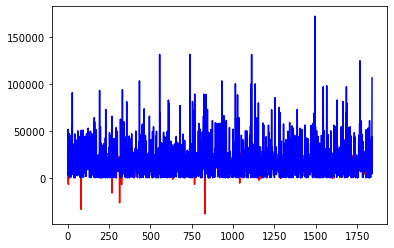

In [370]:
plt.plot(xz.index,xz['Predicted'],color='r')
plt.plot(xz.index,xz['Actual_price'],color='b')
plt.show()

In [ ]:
### Try Linear Regression for all continous variable columns

In [ ]:
### Try Linear Regression for all categorical & continuous variable columns